#### Cargamos librerías y dataframe. Investigamos el dataframe

In [425]:
import pandas as pd
#Librería de visualización de datos:
import matplotlib.pyplot as plt
#Librería de visualización de datos más sencilla y potente basada en matplot
import seaborn as sns
#Para leer .shp files y otras herramientas de visualización de datos
import geopandas as gpd
# Contextily me va a permitir añadir mapas base
#!pip install contextily
import contextily as ctx
import mapclassify

#cargamos el dataframe con la función de pandas read_csv en la variable df
df = pd.read_csv('data/rosario-f.csv')

#mostramos las primeras filas para corrobar que se haya cargado y conocer su estructura
print(df.head())

  interview__key METODO  Coord1__Latitude  Coord1__Longitude     EDAD   \
0    56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1    67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2    24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3    84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4    21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   

       GENERO  INT DE VOTO X ESPACIO      RADIO  
0   Masculino            LIBERTARIOS  820840409  
1   Masculino                  OTROS  820840410  
2    Femenino                  OTROS  820840502  
3   Masculino            LIBERTARIOS  820840502  
4    Femenino         NINGUNO/NOSABE  820841013  


In [216]:
#Conocemos cómo están escritas exactamente cada columna
print(df.columns)

Index(['interview__key', 'METODO', 'Coord1__Latitude', 'Coord1__Longitude',
       ' EDAD ', ' GENERO ', 'INT DE VOTO X ESPACIO', 'RADIO'],
      dtype='object')


In [31]:
#Conocemos los valores únicos de variables de interés
columnas = ['METODO', ' EDAD ', ' GENERO ', 'INT DE VOTO X ESPACIO']
for columna in columnas:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en {columna}: {valores_unicos}")

Valores únicos en METODO: ['F2F' 'IVR']
Valores únicos en  EDAD : ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']
Valores únicos en  GENERO : [' Masculino ' ' Femenino ' ' Otro ']
Valores únicos en INT DE VOTO X ESPACIO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']


#### Información de la muestra

In [34]:
#Conocemos la cantidad de casos
print(len(df))

372


In [393]:
#investigamos si tenemos una cantidad de respuestas relevantes por radio censal para agruparlas
len(df['RADIO'].unique())

232

In [ ]:
#hay 232 radios censales para 372, no sirve agrupar por radio censal

METODO
IVR    271
F2F    101
Name: count, dtype: int64


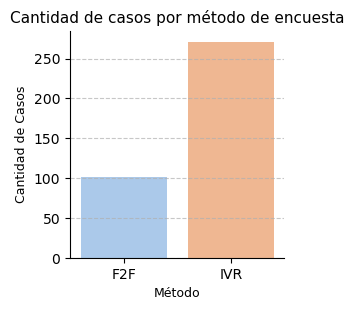

In [90]:
#Conocemos la cantidad de casos según el método realizado con el método de pandas value_count
print((df['METODO'].value_counts()))

#Creamos un gráfico de barras con seaborn. Declaramos la variable independiente (método de encuesta), el tipo de gráfico (count), la fuente de datos,
#la paleta y el tamaño
sns.catplot(x='METODO', hue='METODO', kind='count', data=df, palette='pastel', height=3)

#Títulos
plt.title('Cantidad de casos por método de encuesta', fontsize=11)
plt.xlabel('Método', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 EDAD 
56 y mas    101
36 a 45      99
46 a 55      83
26 a 35      61
16 a 25      28
Name: count, dtype: int64


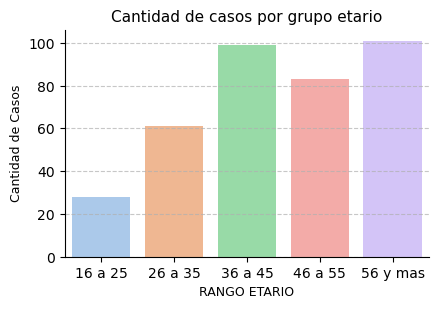

In [465]:
#Conocemos la cantidad de casos según grupo etario
print((df[' EDAD '].value_counts()))

#Creamos un gráfico de barras para saber cantidades por grupo etario. El df de base está ordenado alfabeticamente por la variable Edad
sns.catplot(x=' EDAD ', hue=' EDAD ', kind='count', data=df.sort_values(' EDAD '), palette='pastel', height=3, aspect=1.5)

#Títulos
plt.title('Cantidad de casos por grupo etario', fontsize=11)
plt.xlabel('RANGO ETARIO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 GENERO 
Masculino     198
Femenino      165
Otro            9
Name: count, dtype: int64


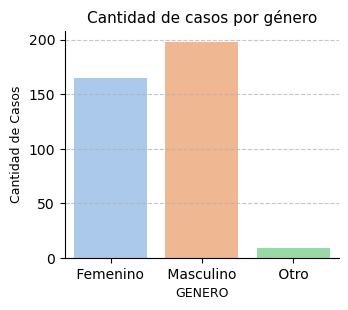

In [463]:
#Conocemos la cantidad de casos según género
print((df[' GENERO '].value_counts()))

#Creamos un gráfico de barras para saber cantidades por grupo etario. El df de base está ordenado alfabeticamente por la variable Edad
sns.catplot(x=' GENERO ', hue=' GENERO ', kind='count', data=df.sort_values(' GENERO '), palette='pastel', height=3, aspect=1.2)

#Títulos
plt.title('Cantidad de casos por género', fontsize=11)
plt.xlabel('GENERO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()